In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

In [2]:
file_names = os.listdir('./미니/')
file_names

['.ipynb_checkpoints',
 'app_m.csv',
 'project.html',
 'year_2021.csv',
 '아파트 매매 2020.xlsx - 아파트(매매) 실거래가.csv']

In [3]:
gj_df = pd.read_csv("./gwangju_apt.csv",encoding = 'utf-8',thousands = ',')

In [4]:
gj_df = gj_df.dropna()
gj_df.isnull().sum()

시군구         0
단지명         0
전용면적(㎡)     0
계약년월        0
거래금액(만원)    0
층           0
건축년도        0
dtype: int64

In [5]:
gj_df

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
0,광주광역시 광산구 월계동,첨단라인1,60.0000,202212.0,24500,2.0,1995.0
1,광주광역시 광산구 송정동,라인1,59.8200,202212.0,10800,9.0,1997.0
2,광주광역시 광산구 송정동,라인1,59.9100,202212.0,12000,10.0,1997.0
3,광주광역시 광산구 월계동,서라,59.9300,202212.0,20800,1.0,1995.0
4,광주광역시 동구 월남동,월남호반베르디움2차,59.9711,202212.0,26000,7.0,2016.0
...,...,...,...,...,...,...,...
82549,광주광역시 광산구 운남동,"운남주공1,2단지",58.1400,202112.0,17000,5.0,1997.0
82550,광주광역시 광산구 장덕동,양우내안애,84.9423,202112.0,44000,16.0,2008.0
82551,광주광역시 광산구 장덕동,대주피오레1단지,84.9411,202112.0,55500,6.0,2009.0
82552,광주광역시 광산구 산정동,어등산대방노블랜드,133.0200,202112.0,74500,5.0,2013.0


In [6]:
gj_df['거래금액(만원)'].info

<bound method Series.info of 0        24500
1        10800
2        12000
3        20800
4        26000
         ...  
82549    17000
82550    44000
82551    55500
82552    74500
82553    19800
Name: 거래금액(만원), Length: 82554, dtype: int64>

In [7]:
gi_dfm = gj_df[['시군구', '거래금액(만원)']].groupby('시군구').mean()
gi_dfm

,거래금액(만원)
시군구,
광주광역시 광산구 도산동,15313.884477
광주광역시 광산구 도천동,9290.688073
광주광역시 광산구 비아동,9921.473684
광주광역시 광산구 산월동,27292.027853
광주광역시 광산구 산정동,30049.969294
...,...
광주광역시 서구 양동,21293.659148
광주광역시 서구 유촌동,18311.215385
광주광역시 서구 치평동,32353.936453


In [8]:
gj_df9=gj_df['시군구'].str.split(expand=True)
gj_df9.drop(columns = 2,axis=1,inplace =True)

In [9]:
gj_df9.rename(columns ={0:'시'},inplace = True)
gj_df9.rename(columns ={1:'구'},inplace = True)

In [10]:
gj_df=pd.concat([gj_df,gj_df9],axis=1)

In [11]:
gj_df= gj_df.drop(columns ="시군구" ,axis=1)

In [12]:
gj_df =gj_df[['시', '구', '단지명', '전용면적(㎡)', '계약년월', '거래금액(만원)', '층', '건축년도']]

In [13]:
gj_df

,시,구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
0,광주광역시,광산구,첨단라인1,60.0000,202212.0,24500,2.0,1995.0
1,광주광역시,광산구,라인1,59.8200,202212.0,10800,9.0,1997.0
2,광주광역시,광산구,라인1,59.9100,202212.0,12000,10.0,1997.0
3,광주광역시,광산구,서라,59.9300,202212.0,20800,1.0,1995.0
4,광주광역시,동구,월남호반베르디움2차,59.9711,202212.0,26000,7.0,2016.0
...,...,...,...,...,...,...,...,...
82549,광주광역시,광산구,"운남주공1,2단지",58.1400,202112.0,17000,5.0,1997.0
82550,광주광역시,광산구,양우내안애,84.9423,202112.0,44000,16.0,2008.0
82551,광주광역시,광산구,대주피오레1단지,84.9411,202112.0,55500,6.0,2009.0
82552,광주광역시,광산구,어등산대방노블랜드,133.0200,202112.0,74500,5.0,2013.0


In [14]:
gj_c= gj_df[['구', '거래금액(만원)']].groupby('구').count()

In [15]:
gj_c.rename(columns ={'거래금액(만원)':'거래횟수'},inplace = True)

In [16]:
gi_dfm = gj_df[['구', '거래금액(만원)']].groupby('구').mean()

In [17]:
gj_dfk=pd.concat([gj_c,gi_dfm],axis=1)
gj_dfk

,거래횟수,거래금액(만원)
구,,
광산구,23095,26676.321498
남구,11240,32310.105338
동구,4914,31439.083028
북구,26756,21651.673419
서구,16549,28860.187564


In [18]:
#gj_df = pd.read_csv("./gwangju_apt.csv",encoding = 'utf-8',thousands = ',')

In [19]:
gj_df["거래금액(만원)"].max()
gj_df[gj_df["거래금액(만원)"]==gj_df["거래금액(만원)"].max()]

,시,구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
7689,광주광역시,남구,봉선동한국아델리움57,166.87,202204.0,213000,11.0,2021.0


In [20]:
gj_df["계약년월"] = gj_df["계약년월"].astype(str).str[:4]
gj_df.head()

,시,구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
0,광주광역시,광산구,첨단라인1,60.0000,2022,24500,2.0,1995.0
1,광주광역시,광산구,라인1,59.8200,2022,10800,9.0,1997.0
2,광주광역시,광산구,라인1,59.9100,2022,12000,10.0,1997.0
3,광주광역시,광산구,서라,59.9300,2022,20800,1.0,1995.0
4,광주광역시,동구,월남호반베르디움2차,59.9711,2022,26000,7.0,2016.0


In [21]:
gj_df_2020= gj_df[gj_df["계약년월"] == '2020']
gj_df_2021= gj_df[gj_df["계약년월"] == '2021']
gj_df_2022= gj_df[gj_df["계약년월"] == '2022']
gj_df_2023= gj_df[gj_df["계약년월"] == '2023']

In [22]:
gj_df_2020[['구', '거래금액(만원)']].groupby('구').mean()


,거래금액(만원)
구,
광산구,26239.316626
남구,31651.656716
동구,30391.661238
북구,21548.431362
서구,28954.590502


In [23]:
gj_df_2021[['구', '거래금액(만원)']].groupby('구').mean()

,거래금액(만원)
구,
광산구,26492.947502
남구,31886.239686
동구,32287.231749
북구,20934.898780
서구,28028.442315


In [24]:
gj_df_2022[['구', '거래금액(만원)']].groupby('구').mean()

,거래금액(만원)
구,
광산구,24943.619286
남구,31706.109966
동구,27018.312749
북구,20750.720437
서구,28433.123462


In [25]:
gj_df_2023[['구', '거래금액(만원)']].groupby('구').mean()

,거래금액(만원)
구,
광산구,29398.581882
남구,35592.551119
동구,35655.563074
북구,24188.712097
서구,30455.763167


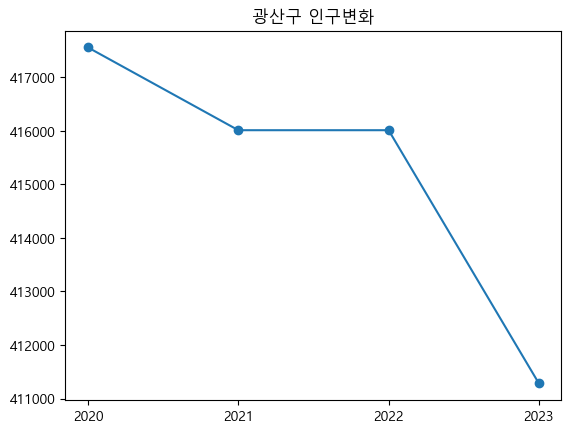

In [27]:
#fruit = ['2020','2021','2022','2023']
#ratio = [26239.316626,26492.947502,24943.619286,29398.581882]#전체 합이 100이되어야함
#plt.bar(ratio, labels =fruit)#소수점 첫째자리까지 표시하고 뒤에 %표현하겠다
#plt.show()
x =['2020','2021','2022','2023']
y =[417557,416012,416012,411282]
plt.title("광산구 인구변화")
plt.plot(x,y,marker="o")
plt.show()

In [ ]:
fruit = ['2020','2021','2022','2023']
ratio = [216032,217032,213816,211227]#전체 합이 100이되어야함
#plt.pie(ratio, labels =fruit,autopct = '%.1f%%')#소수점 첫째자리까지 표시하고 뒤에 %표현하겠다
#plt.show()
plt.title("남구 인구변화")
plt.plot(fruit,ratio,marker="o")

plt.show()

In [ ]:
30391.661238,32287.231749,27018.312749,35655.563074
fruit = ['2020','2021','2022','2023']
ratio = [104510,105077,107550,108893]#전체 합이 100이되어야함
#plt.pie(ratio, labels =fruit,autopct = '%.1f%%')#소수점 첫째자리까지 표시하고 뒤에 %표현하겠다
#plt.show()
plt.title("동구 인구변화")
plt.plot(fruit,ratio,marker="o")
plt.show()

In [ ]:

fruit = ['2020','2021','2022','2023']
ratio = [435063,431587,429573,426867]#전체 합이 100이되어야함
#plt.pie(ratio, labels =fruit,autopct = '%.1f%%')#소수점 첫째자리까지 표시하고 뒤에 %표현하겠다
#plt.show()
plt.title("북구 인구변화")
plt.plot(fruit,ratio,marker="o")
plt.show()

In [ ]:
28954.590502,28028.442315,28433.123462,30455.763167
fruit = ['2020','2021','2022','2023']
ratio = [298223,292837,289282,286316]#전체 합이 100이되어야함
#plt.pie(ratio, labels =fruit,autopct = '%.1f%%')#소수점 첫째자리까지 표시하고 뒤에 %표현하겠다
#plt.show()
plt.title("서구 인구변화")
plt.plot(fruit,ratio,marker="o")
plt.show()

In [ ]:
y = [108893,286316,211227,426867,411282]
x = ['동구','서구','남구','북구','광산구']
plt.ylim(100000,500000)
plt.bar(x,y)
plt.xlabel('행정구역')
plt.ylabel('인구수')
plt.show()

In [ ]:
labels = ['동구','서구','남구','북구', '광산구']
y = [19994.6, 16172.9, 17001.1, 34306.8, 34760.5]#전체 합이 100이되어야함

plt.pie(y,labels=labels,autopct = '%.1f%%')#소수점 첫째자리까지 표시하고 뒤에 %표현하겠다
#plt.title(f"{labels}")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 데이터 생성
x = np.arange(5)
y = np.random.randint(1, 10, size=5)

# 그래프 크기 설정
fig, ax = plt.subplots()

# 아파트 이미지를 불러오기 (경로에 아파트 이미지 파일 넣기)
img = Image.open('./rb_92994.png')  # 사용할 이미지 경로

# 각 막대 위치에 아파트 모양의 이미지를 삽입
for i, height in enumerate(y):
    # 막대 그래프 생성
    ax.bar(i, height, color='lightgrey', width=0.8)

    # 이미지 삽입 좌표 설정
    ax.imshow(img, extent=[i - 0.4, i + 0.4, 0, height], aspect='auto')

# 축 설정 및 그래프 그리기
ax.set_xlim(-0.5, len(x) - 0.5)
ax.set_ylim(0, max(y) + 2)

# X축에 라벨 붙이기
ax.set_xticks(x)
ax.set_xticklabels([f"아파트 {i+1}" for i in x])

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 데이터 생성
x = np.arange(5)
y = [19994.6, 16172.9, 17001.1, 34306.8, 34760.5]

# 아파트 이미지 불러오기
img_path = './aptimge.png'
img = Image.open(img_path)

# 그래프 크기 설정
fig, ax = plt.subplots()

# 각 막대 위치에 아파트 모양의 이미지를 삽입
for i, height in enumerate(y):
    # 막대 그래프 생성 (투명하게)
    ax.bar(i, height, color='lightgrey', width=0.8, alpha=0.3)
    
    # 이미지 삽입 좌표 설정
    ax.imshow(img, extent=[i - 0.4, i + 0.4, 0, height], aspect='auto')

# 축 설정 및 그래프 그리기
ax.set_xlim(-0.5, len(x) - 0.5)
ax.set_ylim(0, max(y) + 2)

# X축에 라벨 붙이기
ax.set_xticks(x)
ax.set_xticklabels([f"아파트 {i+1}" for i in x])

plt.show()
